In [4]:
import pandas as pd
import numpy as np

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_train_df = pd.DataFrame(y_train)


correlation_matrix = y_train_df.corr()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

print("X_train head:\n", pd.DataFrame(X_train).head())
print("y_train head:\n", pd.DataFrame(y_train).head())


X_train shape: (1000, 111)
X_test shape: (700, 111)
y_train shape: (1000, 11)
X_train head:
     0    1    2    3    4    5    6    7    8    9    ...  101  102  103  104  \
0  57.0  5.0  0.0  0.0  0.0  2.0  NaN  2.0  0.0  NaN  ...  3.0  0.0  0.0  3.0   
1  71.0  2.0  2.0  NaN  NaN  2.0  NaN  3.0  0.0  7.0  ...  5.0  NaN  NaN  4.0   
2  64.0  2.0  0.0  NaN  NaN  2.0  NaN  2.0  0.0  1.0  ...  4.0  0.0  3.0  2.0   
3  74.0  1.0  1.0  6.0  2.0  2.0  NaN  2.0  0.0  NaN  ...  4.0  0.0  3.0  3.0   
4  74.0  2.0  0.0  6.0  2.0  0.0  NaN  3.0  0.0  7.0  ...  6.0  0.0  5.0  4.0   

   105  106  107  108  109  110  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  1.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 111 columns]
y_train head:
    0   1   2   3   4   5   6   7   8   9   10
0   1   0   0   0   0   0   0   0   0   0   0
1   0   0   0   1   1   1   1   0   0   0   0
2   1   0   0   0   0   0   0   0   0  

In [5]:
# Find significant correlation between y_train vectors
from scipy.stats import pearsonr

y_train = np.load('y_train.npy')

correlation_matrix = np.zeros((11, 11))
p_values_matrix = np.zeros((11, 11))

for i in range(11):
    for j in range(11):
        if i != j:
            corr, p_val = pearsonr(y_train[:, i], y_train[:, j])
            correlation_matrix[i, j] = corr
            p_values_matrix[i, j] = p_val
        else:
            correlation_matrix[i, j] = 1
            p_values_matrix[i, j] = 0

for i in range(11):
    for j in range(11):
        if i != j:
            if p_values_matrix[i, j] < 0.05:
                print("corr and p:", correlation_matrix[i, j], p_values_matrix[i, j])
                print("i,j:",i,j)

corr and p: 0.08649579037501767 0.006201231733680003
i,j: 0 7
corr and p: 0.0626095280720397 0.047776280388924355
i,j: 2 3
corr and p: 0.0626095280720397 0.047776280388924355
i,j: 3 2
corr and p: 0.08649579037501767 0.006201231733680003
i,j: 7 0
corr and p: 0.07091826214393138 0.02491928754784615
i,j: 8 9
corr and p: 0.07091826214393138 0.02491928754784615
i,j: 9 8


In [6]:
# clean the x_train NaN
import pandas as pd
import numpy as np

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
df_xtrain = pd.DataFrame(X_train)
df_xtest = pd.DataFrame(X_test)

df_xtrain = df_xtrain.fillna(df_xtrain.mean())
df_xtest = df_xtest.fillna(df_xtest.mean())
X_train_filled = df_xtrain.to_numpy()
X_test_filled = df_xtest.to_numpy()
# 保存为.npy文件
np.save('X_train_filled.npy', X_train_filled)
np.save('X_test_filled.npy', X_test_filled)

In [5]:
# Normalize the data
import pandas as pd
import numpy as np

X_train = np.load('X_train_filled.npy')
X_test = np.load('X_test_filled.npy')

for i in range(X_train.shape[1]):
    X_train[:, i] = (X_train[:, i] - np.min(X_train[:, i])) / (np.max(X_train[:, i]) - np.min(X_train[:, i]))
    X_test[:, i] = (X_test[:, i] - np.min(X_test[:, i])) / (np.max(X_test[:, i]) - np.min(X_test[:, i]))

np.save('X_train_normalized.npy', X_train)
np.save('X_test_normalized.npy', X_test)

C:\Users\johnh\AppData\Local\Temp\ipykernel_59352\4113331957.py:9: RuntimeWarning: invalid value encountered in divide
  X_train[:, i] = (X_train[:, i] - np.min(X_train[:, i])) / (np.max(X_train[:, i]) - np.min(X_train[:, i]))
C:\Users\johnh\AppData\Local\Temp\ipykernel_59352\4113331957.py:10: RuntimeWarning: invalid value encountered in divide
  X_test[:, i] = (X_test[:, i] - np.min(X_test[:, i])) / (np.max(X_test[:, i]) - np.min(X_test[:, i]))


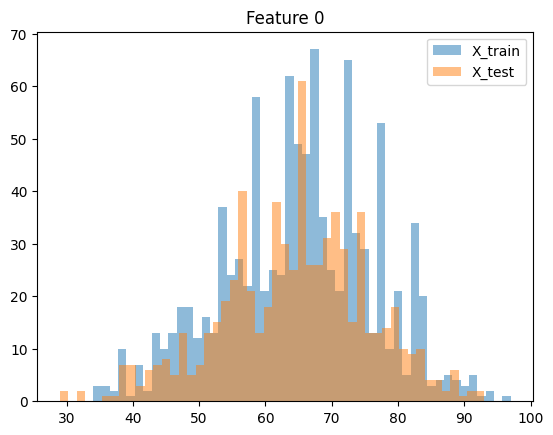

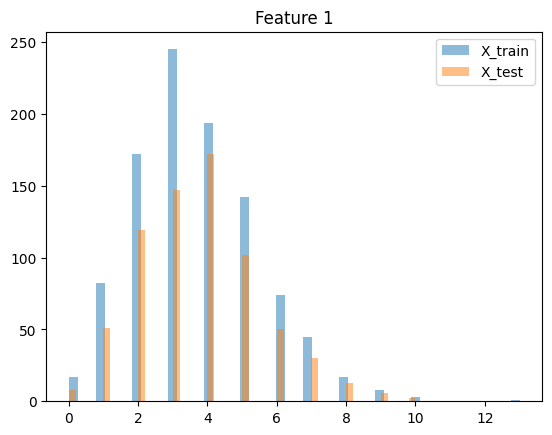

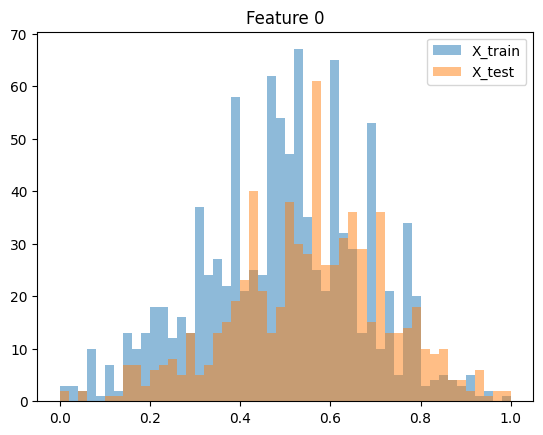

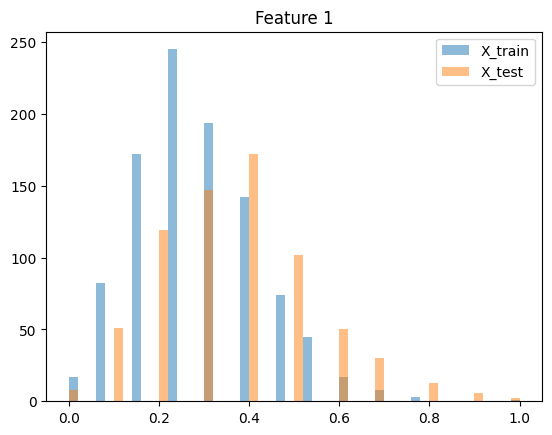

In [6]:
# Plot some histograms

import matplotlib.pyplot as plt
import numpy as np

X_train_norm = np.load('X_train_normalized.npy')
X_test_norm = np.load('X_test_normalized.npy')

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

for i in range(2):
    plt.hist(X_train[:, i], bins=50, alpha=0.5, label='X_train')
    plt.hist(X_test[:, i], bins=50, alpha=0.5, label='X_test')
    plt.legend(loc='upper right')
    plt.title('Feature ' + str(i))
    plt.show()

for i in range(2):
    plt.hist(X_train_norm[:, i], bins=50, alpha=0.5, label='X_train')
    plt.hist(X_test_norm[:, i], bins=50, alpha=0.5, label='X_test')
    plt.legend(loc='upper right')
    plt.title('Feature ' + str(i))
    plt.show()

